# 1. Data Exploration and Preprocessing of Kubernetes Operational Dataset

## Introduction

Welcome to the first notebook in our series on AI for Kubernetes operations! This notebook is designed to help you dive into the world of Kubernetes operational data by exploring and preprocessing a dataset, setting the foundation for building machine learning models in subsequent notebooks.

### Objectives

By the end of this notebook, you will be able to:
- Load and understand the structure of the dataset.
- Perform exploratory data analysis (EDA) to uncover meaningful insights.
- Handle missing values and outliers effectively.
- Engineer features for machine learning models.
- Use interactive widgets to explore and analyze data dynamically.

### Key Features

This notebook introduces:
- Visual tools for understanding your data, such as histograms, KDE plots, and heatmaps.
- Interactive widgets for exploring feature distributions and relationships.
- Practical preprocessing techniques like scaling, encoding, and handling missing values.

### How to Use This Notebook

1. **Dataset Preparation:** Ensure the file `kubernetes_operational_data.csv` is located in the `data` directory.
2. **Run the Notebook Sequentially:** Execute each cell in order to follow the data preparation pipeline.
3. **Engage with Interactive Elements:** Use the widgets to dynamically explore data distributions and patterns.

### Dataset Overview

The dataset `kubernetes_operational_data.csv` contains metrics, events, and operational logs collected from a Kubernetes cluster. Below is a brief description of key columns:
- **timestamp**: Time when the metric or event was recorded.
- **cpu_allocation_efficiency**: Efficiency of CPU allocation across pods.
- **memory_allocation_efficiency**: Efficiency of memory allocation.
- **disk_io**: Disk Input/Output activity in bytes.
- **network_latency**: Network delay in milliseconds.
- **node_temperature**: Temperature of Kubernetes nodes.
- **event_type**: Type of operational event (e.g., Normal, Warning, Error).
- **scaling_event**: Indicates whether a scaling action occurred (1 for Yes, 0 for No).
- **pod_lifetime_seconds**: Total runtime of pods in seconds.

This dataset will be explored and transformed step by step to prepare it for machine learning in subsequent notebooks.

## 1. Setup and Libraries

Before we dive into data exploration and preprocessing, let's set up our environment by installing and importing the necessary libraries.

### Dependencies
- **pandas**: For data manipulation and analysis.
- **numpy**: For numerical operations.
- **matplotlib and seaborn**: For creating visualizations.
- **missingno**: For visualizing missing data patterns.
- **ipywidgets**: For adding interactivity to the notebook.
- **scikit-learn**: For preprocessing tasks like scaling and encoding.

In [103]:
# Install required packages
%pip install pandas matplotlib seaborn missingno ipywidgets scikit-learn --quiet

Note: you may need to restart the kernel to use updated packages.


In [104]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import ipywidgets as widgets
from ipywidgets import interact

# Set global style for plots
# plt.style.use("seaborn")
# Use a valid Matplotlib style or Seaborn's built-in themes
sns.set_theme(style="whitegrid")  # Seaborn's preferred theme

sns.set_palette("pastel")

## 2. Loading the Dataset

Now, let's load the Kubernetes operational dataset. This dataset contains metrics and events recorded over time, which we will explore and preprocess for machine learning.

### **Instructions**
- Ensure the file `kubernetes_operational_data.csv` is located in the `data` directory.
- The `timestamp` column will be parsed as a datetime object for easier manipulation.

### **Loading the Data**
We'll begin by loading the data into a Pandas DataFrame and inspecting its structure.

In [105]:
# Load the dataset
DATA_PATH = "data/kubernetes_operational_data.csv"
try:
    df = pd.read_csv(DATA_PATH, parse_dates=["timestamp"])
    print(f"Dataset loaded successfully. Shape: {df.shape}")
except FileNotFoundError:
    print(
        f"Error: The file {DATA_PATH} was not found. Ensure it is in the correct directory."
    )

Dataset loaded successfully. Shape: (15000, 14)


## 3. Exploratory Data Analysis (EDA)

Exploratory Data Analysis helps us understand the structure and patterns within the dataset. In this section, we'll:
1. Preview the dataset.
2. Analyze basic statistics for numerical and categorical features.
3. Visualize distributions and relationships between key variables.

### 3.1. Data Overview

Below is a preview of the dataset along with a summary of its structure and basic statistics.

In [106]:
# Display the first few rows of the dataset
print("Preview of the Dataset:")
display(df.head())

Preview of the Dataset:


,timestamp,pod_name,namespace,cpu_allocation_efficiency,memory_allocation_efficiency,disk_io,network_latency,node_temperature,node_cpu_usage,node_memory_usage,event_type,event_message,scaling_event,pod_lifetime_seconds
0,2023-01-01,pod_0,dev,0.038162,0.949259,9.993579,13.722542,77.619073,93.177619,37.900532,Warning,Killed,False,119648
1,2023-01-01,pod_1,default,0.500763,0.048543,935.792442,55.493953,84.182245,61.442289,5.208161,Error,Failed,True,144516
2,2023-01-01,pod_2,kube-system,0.746726,0.447345,328.352359,173.910016,21.295244,55.819311,18.335802,Normal,Completed,True,68857
3,2023-01-01,pod_3,default,0.526692,0.870251,778.297708,67.395729,85.028829,78.968463,94.619689,Warning,OOMKilled,True,72080
4,2023-01-01,pod_4,prod,0.425342,0.885459,711.181295,91.724730,29.157695,52.718141,70.770594,Error,Killed,False,123016


In [107]:
# Display a concise summary of the DataFrame
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     15000 non-null  datetime64[ns]
 1   pod_name                      15000 non-null  object        
 2   namespace                     15000 non-null  object        
 3   cpu_allocation_efficiency     15000 non-null  float64       
 4   memory_allocation_efficiency  15000 non-null  float64       
 5   disk_io                       15000 non-null  float64       
 6   network_latency               15000 non-null  float64       
 7   node_temperature              15000 non-null  float64       
 8   node_cpu_usage                15000 non-null  float64       
 9   node_memory_usage             15000 non-null  float64       
 10  event_type                    15000 non-null  object        
 11  event_

In [108]:
# Display summary statistics
print("\nSummary Statistics:")
display(df.describe(include="all").transpose())


Summary Statistics:


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
timestamp,15000,NaN,NaN,NaN,2023-01-01 02:04:30,2023-01-01 00:00:00,2023-01-01 01:02:00,2023-01-01 02:04:30,2023-01-01 03:07:00,2023-01-01 04:09:00,NaN
pod_name,15000,15000,pod_0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
namespace,15000,4,dev,3853,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpu_allocation_efficiency,15000.0,NaN,NaN,NaN,0.500843,0.000165,0.252717,0.501555,0.747617,0.999957,0.288213
memory_allocation_efficiency,15000.0,NaN,NaN,NaN,0.501448,0.000078,0.249897,0.499775,0.75285,0.99996,0.28983
disk_io,15000.0,NaN,NaN,NaN,499.580661,0.090925,250.814566,497.133849,747.53538,999.919897,287.769516
network_latency,15000.0,NaN,NaN,NaN,99.81181,0.000564,49.599228,99.046093,150.549303,199.998813,57.929142
node_temperature,15000.0,NaN,NaN,NaN,60.087796,20.000494,40.059461,60.000056,80.126939,99.981225,23.112204
node_cpu_usage,15000.0,NaN,NaN,NaN,49.39082,0.022562,24.44818,49.266834,73.929835,99.996519,28.774625
node_memory_usage,15000.0,NaN,NaN,NaN,50.163728,0.009563,25.184379,50.032371,75.417713,99.999938,28.940546


### 3.2. Data Types

- Numerical Features: Metrics like `cpu_allocation_efficiency`, `disk_io`, etc.
- Categorical Features: Columns like `namespace`, `event_type`, and `event_message`.

Let's identify and visualize the distribution of categorical features.

In [109]:
# Identify non-numeric (categorical) columns, excluding 'pod_name'
categorical_columns = df.select_dtypes(include=["object"]).columns
categorical_columns = [col for col in categorical_columns if col != "pod_name"]



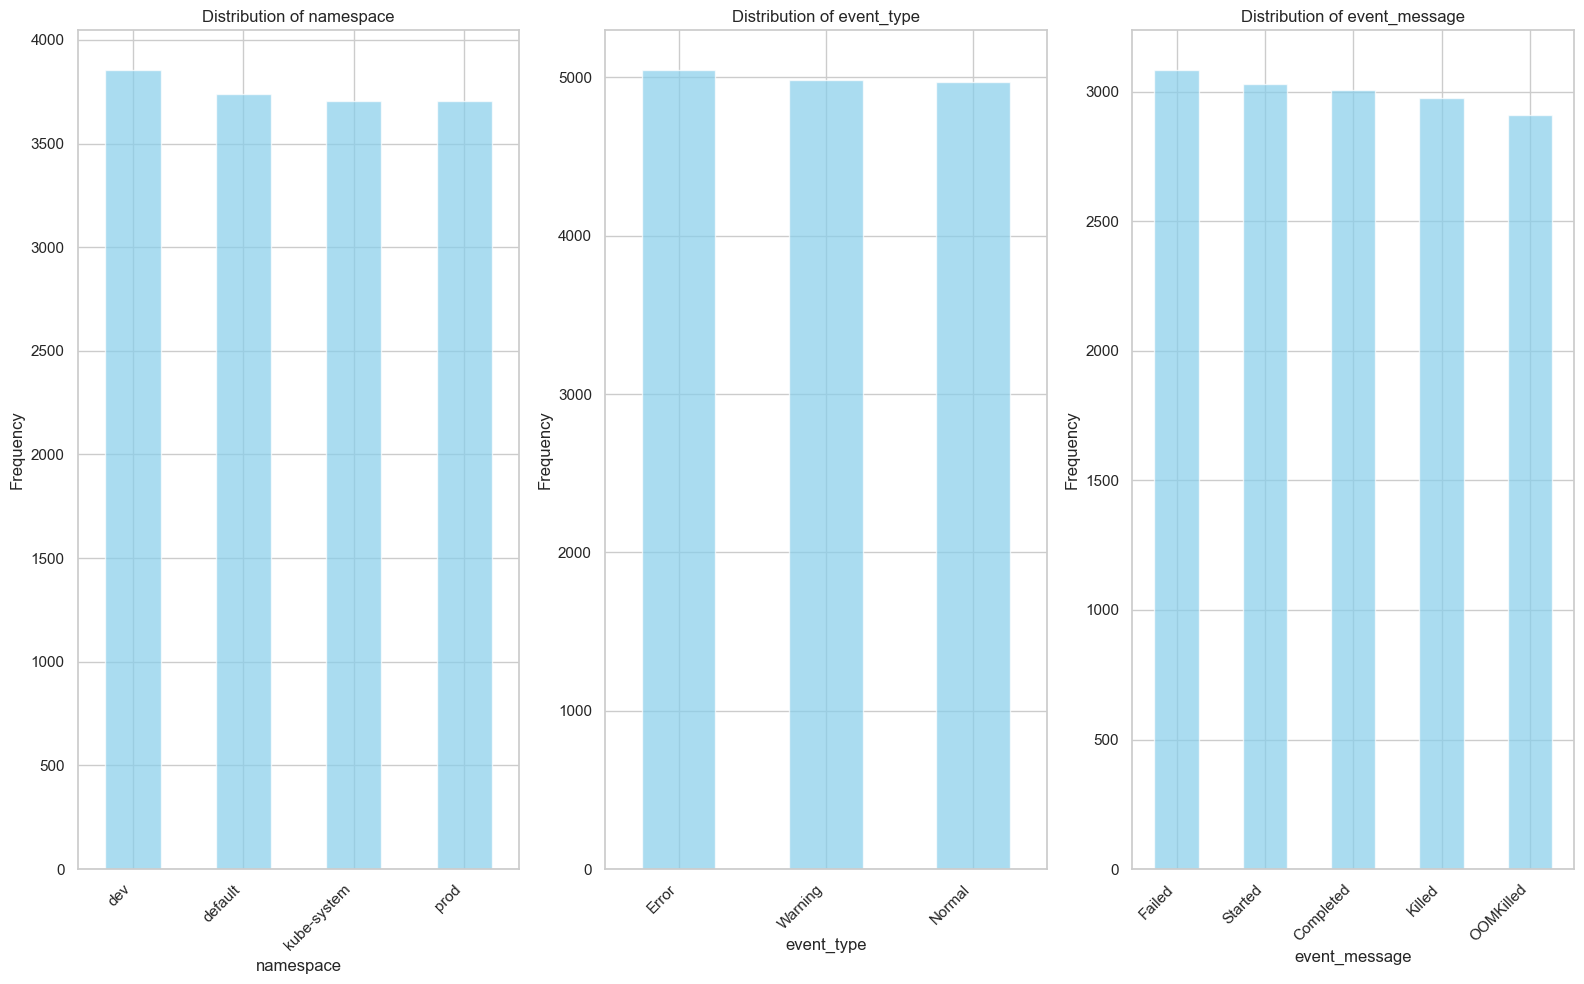

In [110]:
# Visualize the distribution of categorical features
plt.figure(figsize=(16, 10))
for i, column in enumerate(categorical_columns, start=1):
    plt.subplot((len(categorical_columns) + 2) // 3, 3, i)
    df[column].value_counts().plot(kind="bar", color="skyblue", alpha=0.7)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha="right")

# Adjust layout for readability
plt.tight_layout()
plt.show()

## 4. Handling Missing Data

Missing data can negatively impact the quality of analysis and machine learning models. In this section, we will:
1. Identify missing values in the dataset.
2. Visualize missing data patterns.
3. Handle missing values using appropriate strategies.

### 4.1 Identifying Missing Values

We'll begin by calculating the number of missing values in each column to understand the extent of the issue.

In [111]:
# Check for missing values
missing_values = df.isna().sum()
print("Missing Values by Column:")
print(missing_values)

Missing Values by Column:
timestamp                       0
pod_name                        0
namespace                       0
cpu_allocation_efficiency       0
memory_allocation_efficiency    0
disk_io                         0
network_latency                 0
node_temperature                0
node_cpu_usage                  0
node_memory_usage               0
event_type                      0
event_message                   0
scaling_event                   0
pod_lifetime_seconds            0
dtype: int64


### 4.2 Visualizing Missing Data

To better understand the distribution and patterns of missing data, we’ll use a bar chart and a matrix plot.

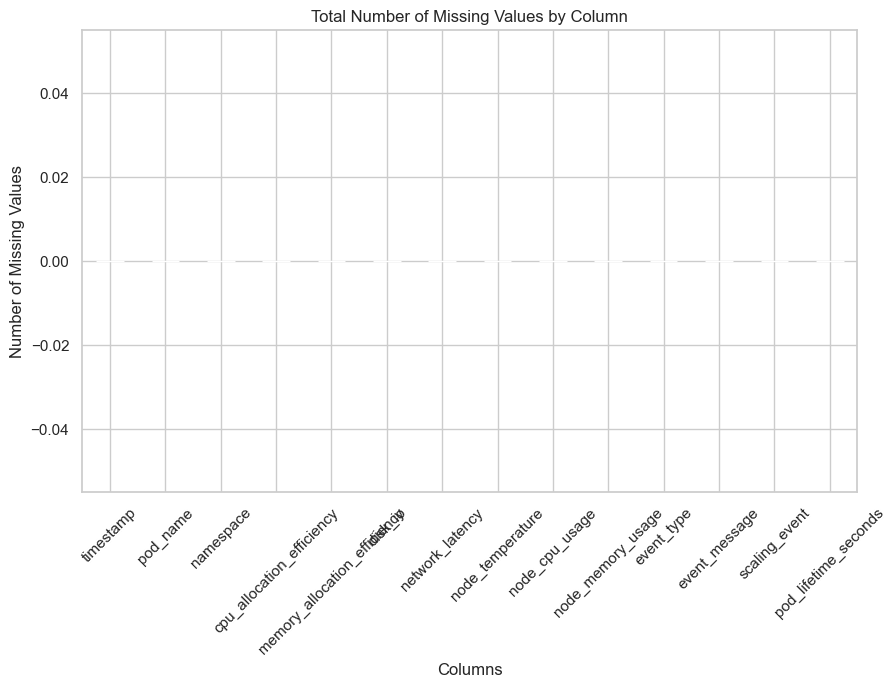

In [112]:
# Visualize missing values as a bar chart
plt.figure(figsize=(10, 6))
missing_values.plot(kind="bar", color="skyblue")
plt.title("Total Number of Missing Values by Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45)
plt.show()



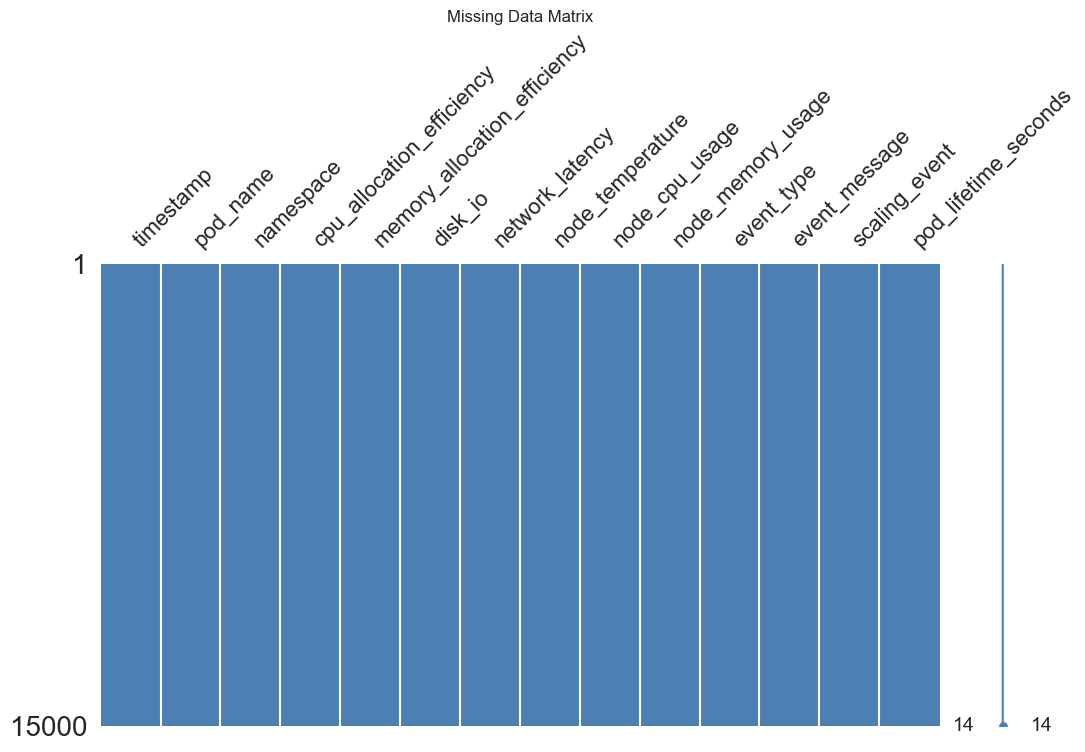

In [113]:
# Use missingno for a matrix visualization
msno.matrix(df, figsize=(12, 6), color=(0.3, 0.5, 0.7))
plt.title("Missing Data Matrix")
plt.show()

### How to Read the Missing Data Matrix

The Missing Data Matrix is a visualization of the dataset's completeness. Each column represents a feature, and each row represents a sample (data entry). Here's how to interpret the visualization:

1. **Blue Lines (Complete Data)**:
   - Fully blue columns indicate that the corresponding feature has no missing values.
   - In this matrix, all columns are completely blue, meaning no missing data is present in the dataset.

2. **Black Gaps (Missing Data)**:
   - Black gaps in a column would indicate missing values for that feature.
   - The more black gaps a column has, the more incomplete the feature is.

3. **Patterns of Missingness**:
   - **No Patterns**: Random missing values (scattered black gaps across rows).
   - **Structured Patterns**: Missing data in clusters (e.g., specific rows or columns), indicating potential systematic issues (e.g., sensors failing at certain times).

4. **Row Consistency**:
   - Fully blue rows (horizontal lines) indicate that no samples have missing data.
   - If some rows had black gaps across multiple features, those rows would be incomplete and might require removal.

### 4.3 Handling Missing Values

Based on the missing data patterns observed:
- Columns with significant missing values may need to be dropped.
- For others, imputation strategies like mean, median, or mode substitution may be used.

We'll handle missing data as follows:
- Drop rows with missing critical values (if applicable).
- Impute numeric columns with their median values.
- Impute categorical columns with their mode.

In [114]:
# Drop rows with missing critical values
df_cleaned = df.dropna(
    subset=["timestamp"]
)  # Replace with critical column names if applicable

# Impute numeric columns with their median
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].apply(
    lambda x: x.fillna(x.median())
)

# Impute categorical columns with their mode
categorical_columns = df_cleaned.select_dtypes(include=["object"]).columns
df_cleaned[categorical_columns] = df_cleaned[categorical_columns].apply(
    lambda x: x.fillna(x.mode()[0])
)

# Verify that no missing values remain
print("Missing Values After Imputation:")
print(df_cleaned.isna().sum())

Missing Values After Imputation:
timestamp                       0
pod_name                        0
namespace                       0
cpu_allocation_efficiency       0
memory_allocation_efficiency    0
disk_io                         0
network_latency                 0
node_temperature                0
node_cpu_usage                  0
node_memory_usage               0
event_type                      0
event_message                   0
scaling_event                   0
pod_lifetime_seconds            0
dtype: int64


## 5. Visualizing Numerical Features

Understanding numerical feature distributions is crucial for detecting patterns, anomalies, and potential preprocessing needs. In this section, we’ll:
1. Visualize feature distributions using histograms and KDE plots.
2. Identify potential outliers using box plots.

### 5.1 Histograms with KDE

The histograms below show the distribution of numerical features in the dataset, overlaid with KDE (Kernel Density Estimation) curves.

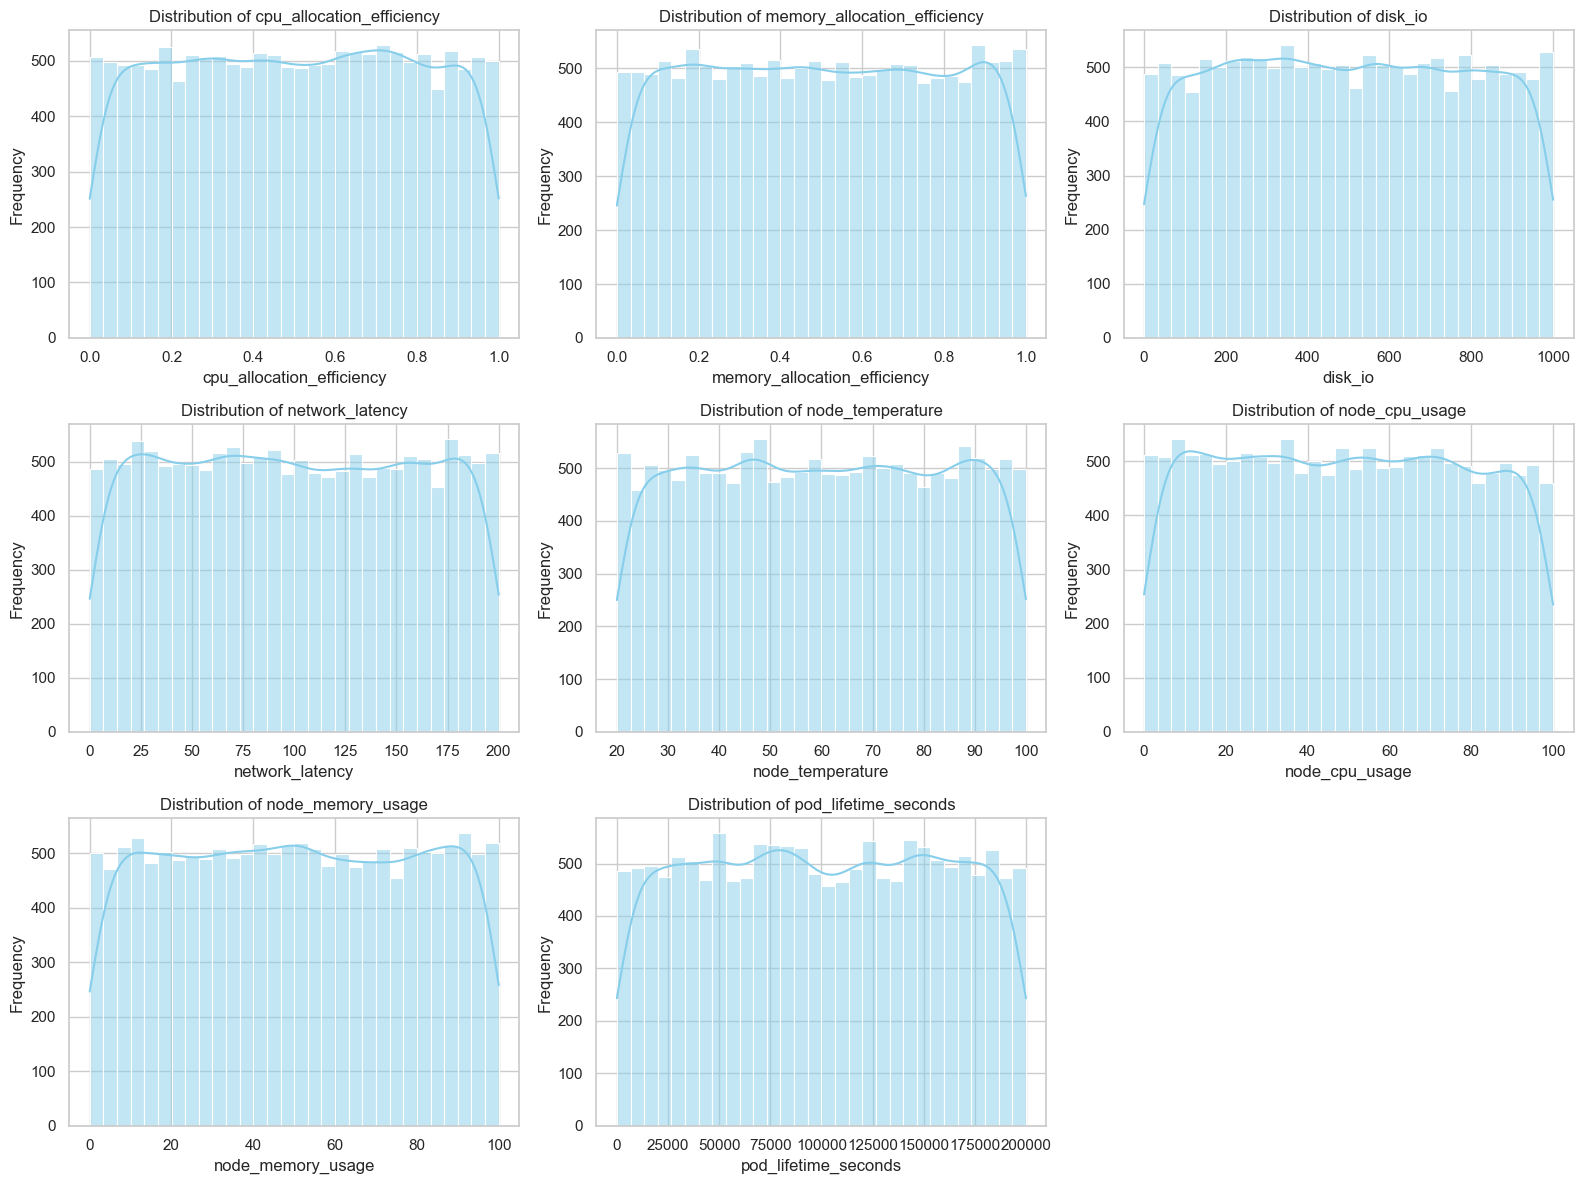

In [115]:
# List of numerical features
numerical_features = [
    "cpu_allocation_efficiency",
    "memory_allocation_efficiency",
    "disk_io",
    "network_latency",
    "node_temperature",
    "node_cpu_usage",
    "node_memory_usage",
    "pod_lifetime_seconds",
]

# Create aggregated histograms with KDE
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(df_cleaned[feature], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### How to Analyze the Histograms with KDE

Use the following guidelines to interpret the charts and extract meaningful insights:

1. **Central Tendency (Most Common Values):**
   - Look for the peak(s) in the histogram or KDE curve.
   - Identify the range where most of the data points fall.
   - Example: If a peak occurs near 0.5 for `cpu_allocation_efficiency`, it means that most pods use 50% of their allocated CPU.

2. **Spread (Range of Values):**
   - Examine the width of the distribution to understand the range of values for each feature.
   - A narrow distribution indicates consistent behavior, while a wide distribution suggests variability.
   - Example: A wide spread in `network_latency` might indicate fluctuating network performance.

3. **Shape of the Distribution:**
   - **Uniform Distribution:** Values are evenly spread, as seen in metrics like `cpu_allocation_efficiency`.
   - **Skewed Distribution:** If the peak is heavily toward one side, it indicates imbalance in the data.
   - **Multimodal Distribution:** Multiple peaks in the KDE curve suggest different operational scenarios or clusters within the data.

4. **Outliers:**
   - Check for unusually high or low bars at the edges of the histogram.
   - These outliers may represent abnormal pod or node behavior, requiring special attention in preprocessing.
   - Example: Pods with extremely high `pod_lifetime_seconds` may need to be flagged as persistent workloads.

5. **Business Context:**
   - Relate the distribution to real-world operations:
     - Are peaks where you expect them based on how Kubernetes is set up?
     - Do spreads or outliers align with known operational behaviors (e.g., high disk I/O during backups)?

### 5.2 Box Plots for Outlier Detection

Box plots help identify outliers and understand the spread of values for numerical features. Outliers are represented as individual points outside the whiskers.

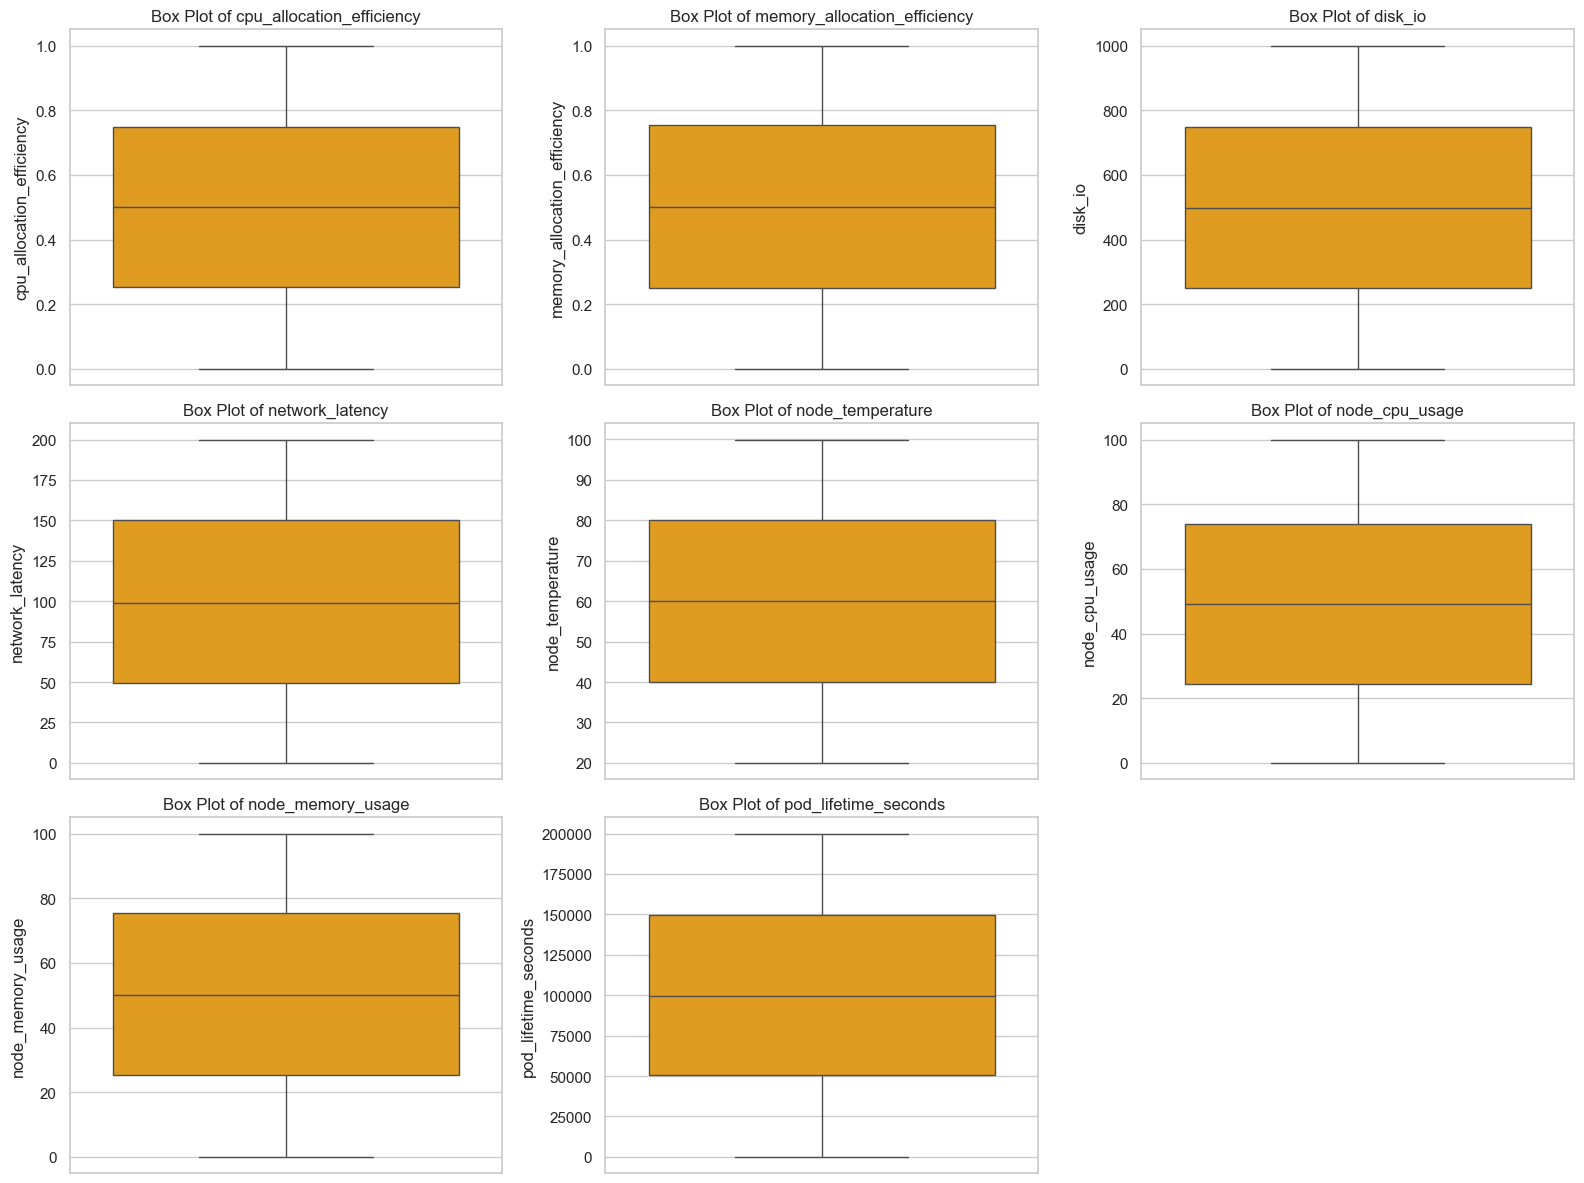

In [116]:
# Create aggregated box plots
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_cleaned[feature], color="orange")
    plt.title(f"Box Plot of {feature}")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

### How to Analyze Box Plots

Box plots are great tools for understanding the spread, central tendencies, and potential outliers in numerical features. Use the following guidelines to analyze the box plots:

1. **Median (Central Tendency):**
   - The horizontal line inside the box represents the **median** (50th percentile) of the data.
   - Compare the median's position within the box:
     - A centered median indicates symmetry in the data.
     - A skewed median (closer to one edge) suggests asymmetry or skewness.

2. **Spread (Interquartile Range - IQR):**
   - The box represents the **interquartile range (IQR)**, which is the range between the 25th percentile (Q1) and the 75th percentile (Q3).
   - A wider box means more variability in the middle 50% of the data, while a narrow box indicates consistent values.

3. **Whiskers (Overall Range):**
   - The lines (whiskers) extending from the box show the range of values that fall within 1.5 times the IQR.
   - Values beyond the whiskers are considered **outliers**.

4. **Outliers:**
   - Points beyond the whiskers are marked as individual dots.
   - These outliers may indicate abnormal or exceptional behavior in the data.
   - Example: In `pod_lifetime_seconds`, exceptionally high values may represent persistent pods.

5. **Symmetry and Skewness:**
   - Check if the box is symmetric around the median or skewed to one side.
   - Skewness provides insights into whether most of the data is concentrated in lower or higher ranges.

## 6. Feature Engineering and Scaling

Feature engineering transforms raw data into meaningful features that better capture patterns and relationships for machine learning. In this section, we’ll:
1. Extract time-based features.
2. Engineer derived features to enhance operational insights.
3. Normalize and scale numerical features for model readiness.

### 6.1 Extracting Time-Based Features

The `timestamp` column contains valuable temporal information, which we can use to extract:
- **Hour of the Day**: Workload trends throughout the day.
- **Day of the Week**: Differentiates weekday vs. weekend workloads.


In [117]:
# Extract time-based features
df_cleaned["hour"] = df_cleaned["timestamp"].dt.hour
df_cleaned["day_of_week"] = df_cleaned["timestamp"].dt.dayofweek

# Display new columns
print("Extracted Time-Based Features:")
display(df_cleaned[["timestamp", "hour", "day_of_week"]].head())

Extracted Time-Based Features:


,timestamp,hour,day_of_week
0,2023-01-01,0,6
1,2023-01-01,0,6
2,2023-01-01,0,6
3,2023-01-01,0,6
4,2023-01-01,0,6


### 6.2 Creating Derived Features

Derived features combine or transform existing columns to create new operational insights, such as:
- **Resource Efficiency**: Average of CPU and memory allocation efficiencies.
- **IO-Latency Ratio**: Relationship between disk I/O and network latency.


In [118]:
# Create derived features
df_cleaned["resource_efficiency"] = (
    df_cleaned["cpu_allocation_efficiency"] + df_cleaned["memory_allocation_efficiency"]
) / 2
df_cleaned["io_latency_ratio"] = df_cleaned["disk_io"] / (
    df_cleaned["network_latency"] + 1
)

# Display derived features
print("Derived Features:")
display(
    df_cleaned[
        [
            "cpu_allocation_efficiency",
            "memory_allocation_efficiency",
            "resource_efficiency",
        ]
    ].head()
)

display(df_cleaned[["disk_io", "network_latency", "io_latency_ratio"]].head())

Derived Features:


,cpu_allocation_efficiency,memory_allocation_efficiency,resource_efficiency
0,0.038162,0.949259,0.493711
1,0.500763,0.048543,0.274653
2,0.746726,0.447345,0.597035
3,0.526692,0.870251,0.698472
4,0.425342,0.885459,0.655401


,disk_io,network_latency,io_latency_ratio
0,9.993579,13.722542,0.678794
1,935.792442,55.493953,16.564471
2,328.352359,173.910016,1.877264
3,778.297708,67.395729,11.379332
4,711.181295,91.724730,7.669813


### 6.3 Encoding Categorical Variables

Categorical columns like `namespace`, `event_type`, and `event_message` must be converted into numerical formats. We’ll apply:
- **One-Hot Encoding**: For columns with a limited number of categories.
- **Binary Encoding**: For binary columns like `scaling_event`.


In [119]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(
    df_cleaned, columns=["namespace", "event_type", "event_message"]
)

# Encode binary column
df_encoded["scaling_event"] = df_encoded["scaling_event"].astype(int)

# Display encoded columns
print("Encoded Categorical Features:")
display(df_encoded.head())

Encoded Categorical Features:


,timestamp,pod_name,cpu_allocation_efficiency,memory_allocation_efficiency,disk_io,network_latency,node_temperature,node_cpu_usage,node_memory_usage,scaling_event,...,namespace_kube-system,namespace_prod,event_type_Error,event_type_Normal,event_type_Warning,event_message_Completed,event_message_Failed,event_message_Killed,event_message_OOMKilled,event_message_Started
0,2023-01-01,pod_0,0.038162,0.949259,9.993579,13.722542,77.619073,93.177619,37.900532,0,...,False,False,False,False,True,False,False,True,False,False
1,2023-01-01,pod_1,0.500763,0.048543,935.792442,55.493953,84.182245,61.442289,5.208161,1,...,False,False,True,False,False,False,True,False,False,False
2,2023-01-01,pod_2,0.746726,0.447345,328.352359,173.910016,21.295244,55.819311,18.335802,1,...,True,False,False,True,False,True,False,False,False,False
3,2023-01-01,pod_3,0.526692,0.870251,778.297708,67.395729,85.028829,78.968463,94.619689,1,...,False,False,False,False,True,False,False,False,True,False
4,2023-01-01,pod_4,0.425342,0.885459,711.181295,91.724730,29.157695,52.718141,70.770594,0,...,False,True,True,False,False,False,False,True,False,False


### 6.4 Scaling and Normalization

To prepare numerical features for machine learning:
- **Standardization (Z-Score Scaling)**: Scales features to have a mean of 0 and a standard deviation of 1.
- **Normalization (Min-Max Scaling)**: Scales features to a fixed range, usually [0, 1].

In [120]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Instantiate scalers
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

# Scale the numerical features
standard_scaled_df = pd.DataFrame(
    standard_scaler.fit_transform(df_encoded[numerical_features]),
    columns=numerical_features,
)

min_max_scaled_df = pd.DataFrame(
    min_max_scaler.fit_transform(df_encoded[numerical_features]),
    columns=numerical_features,
)

# Display scaled data
print("Standard Scaled Features:")
display(standard_scaled_df.describe())

print("\nMin-Max Scaled Features:")
display(min_max_scaled_df.describe())

Standard Scaled Features:


,cpu_allocation_efficiency,memory_allocation_efficiency,disk_io,network_latency,node_temperature,node_cpu_usage,node_memory_usage,pod_lifetime_seconds
count,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04
mean,-1.409243e-16,4.357995e-17,-4.476419e-17,-1.956361e-16,-1.222134e-16,-5.352755e-17,-1.061077e-16,8.858099e-17
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-1.737240e+00,-1.729933e+00,-1.735786e+00,-1.723046e+00,-1.734523e+00,-1.715744e+00,-1.733065e+00,-1.741141e+00
25%,-8.609424e-01,-8.679550e-01,-8.644918e-01,-8.668220e-01,-8.665986e-01,-8.668565e-01,-8.631552e-01,-8.642811e-01
50%,2.468570e-03,-5.774378e-03,-8.502965e-03,-1.321860e-02,-3.796380e-03,-4.308987e-03,-4.539033e-03,-1.216880e-02
75%,8.562485e-01,8.674397e-01,8.616722e-01,8.758836e-01,8.670662e-01,8.528289e-01,8.726451e-01,8.647607e-01
max,1.731810e+00,1.720070e+00,1.738738e+00,1.729533e+00,1.726134e+00,1.758750e+00,1.722078e+00,1.736438e+00



Min-Max Scaled Features:


,cpu_allocation_efficiency,memory_allocation_efficiency,disk_io,network_latency,node_temperature,node_cpu_usage,node_memory_usage,pod_lifetime_seconds
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.500783,0.501429,0.499575,0.499061,0.501212,0.493811,0.501590,0.500676
std,0.288273,0.289864,0.287819,0.289648,0.288972,0.287821,0.289433,0.287566
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.252605,0.249849,0.250767,0.247995,0.250797,0.244320,0.251772,0.252147
50%,0.501494,0.499756,0.497128,0.495232,0.500115,0.492571,0.500276,0.497177
75%,0.747608,0.752861,0.747572,0.752750,0.751762,0.739265,0.754154,0.749344
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 7. Correlation Analysis and Interactivity

Correlation analysis helps uncover relationships between features, which is essential for understanding data patterns and dependencies.

### 7.1 Heatmap of Numeric Features

A heatmap visualizes the strength of relationships:
- **Positive Correlation**: Values closer to +1 indicate a strong positive relationship.
- **Negative Correlation**: Values closer to -1 indicate a strong negative relationship.
- **No Correlation**: Values near 0 indicate no linear relationship.


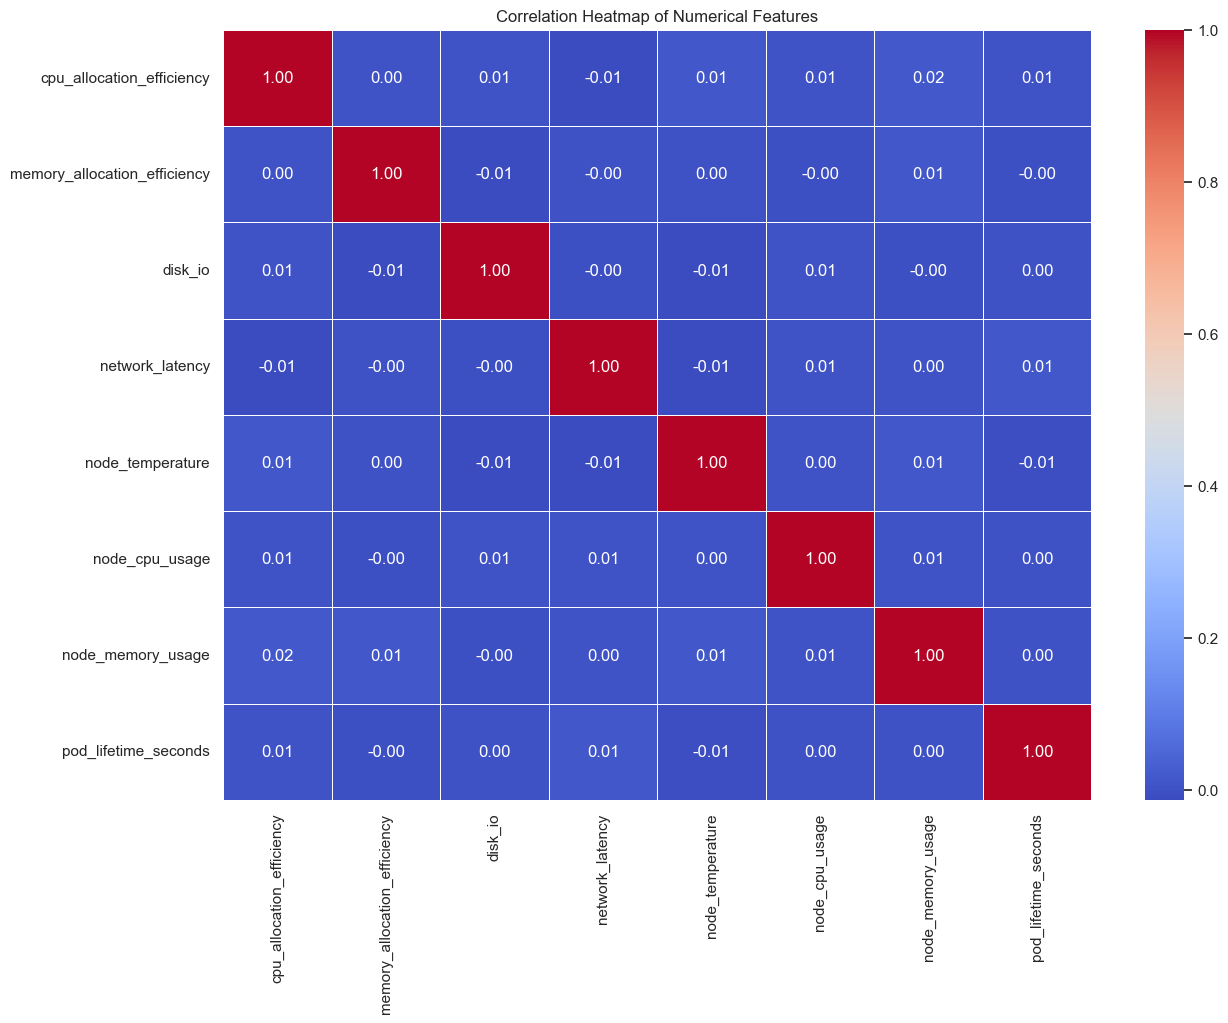

In [121]:
# Compute correlation matrix
correlation_matrix = df_encoded[numerical_features].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

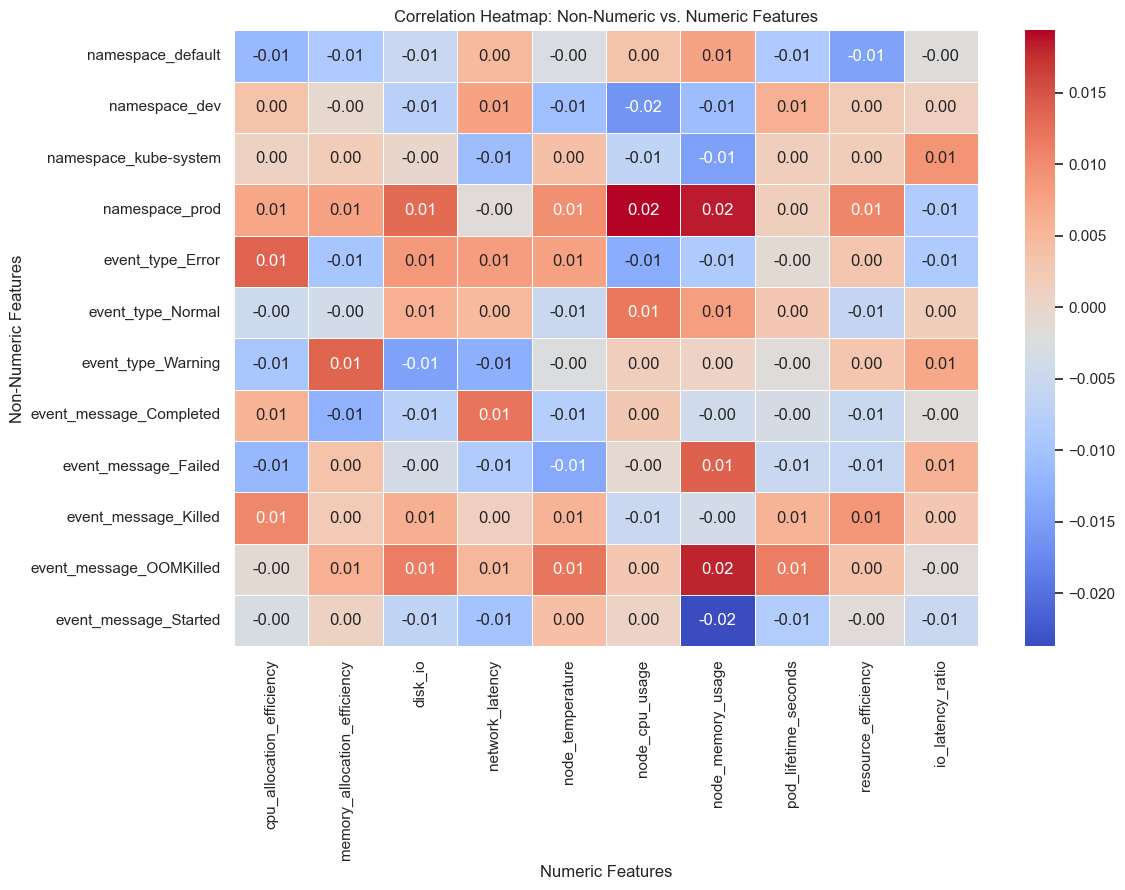

In [122]:
from sklearn.preprocessing import LabelEncoder

# Identify non-numeric and numeric columns
non_numeric_columns = [
    "namespace_default",
    "namespace_dev",
    "namespace_kube-system",
    "namespace_prod",
    "event_type_Error",
    "event_type_Normal",
    "event_type_Warning",
    "event_message_Completed",
    "event_message_Failed",
    "event_message_Killed",
    "event_message_OOMKilled",
    "event_message_Started",
]
numeric_columns = [
    "cpu_allocation_efficiency",
    "memory_allocation_efficiency",
    "disk_io",
    "network_latency",
    "node_temperature",
    "node_cpu_usage",
    "node_memory_usage",
    "pod_lifetime_seconds",
    "resource_efficiency",
    "io_latency_ratio",
]

# Encode non-numeric columns using LabelEncoder
encoded_df = df_encoded.copy()
label_encoders = {}
for col in non_numeric_columns:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col])
    label_encoders[col] = le

# Compute the correlation matrix between non-numeric and numeric columns
correlation_matrix = (
    encoded_df[non_numeric_columns + numeric_columns]
    .corr()
    .loc[non_numeric_columns, numeric_columns]
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Non-Numeric vs. Numeric Features")
plt.xlabel("Numeric Features")
plt.ylabel("Non-Numeric Features")
plt.show()

### 7.2 Feature Exploration

Explore feature distributions dynamically using interactive widgets. Select a feature from the dropdown to view its distribution.

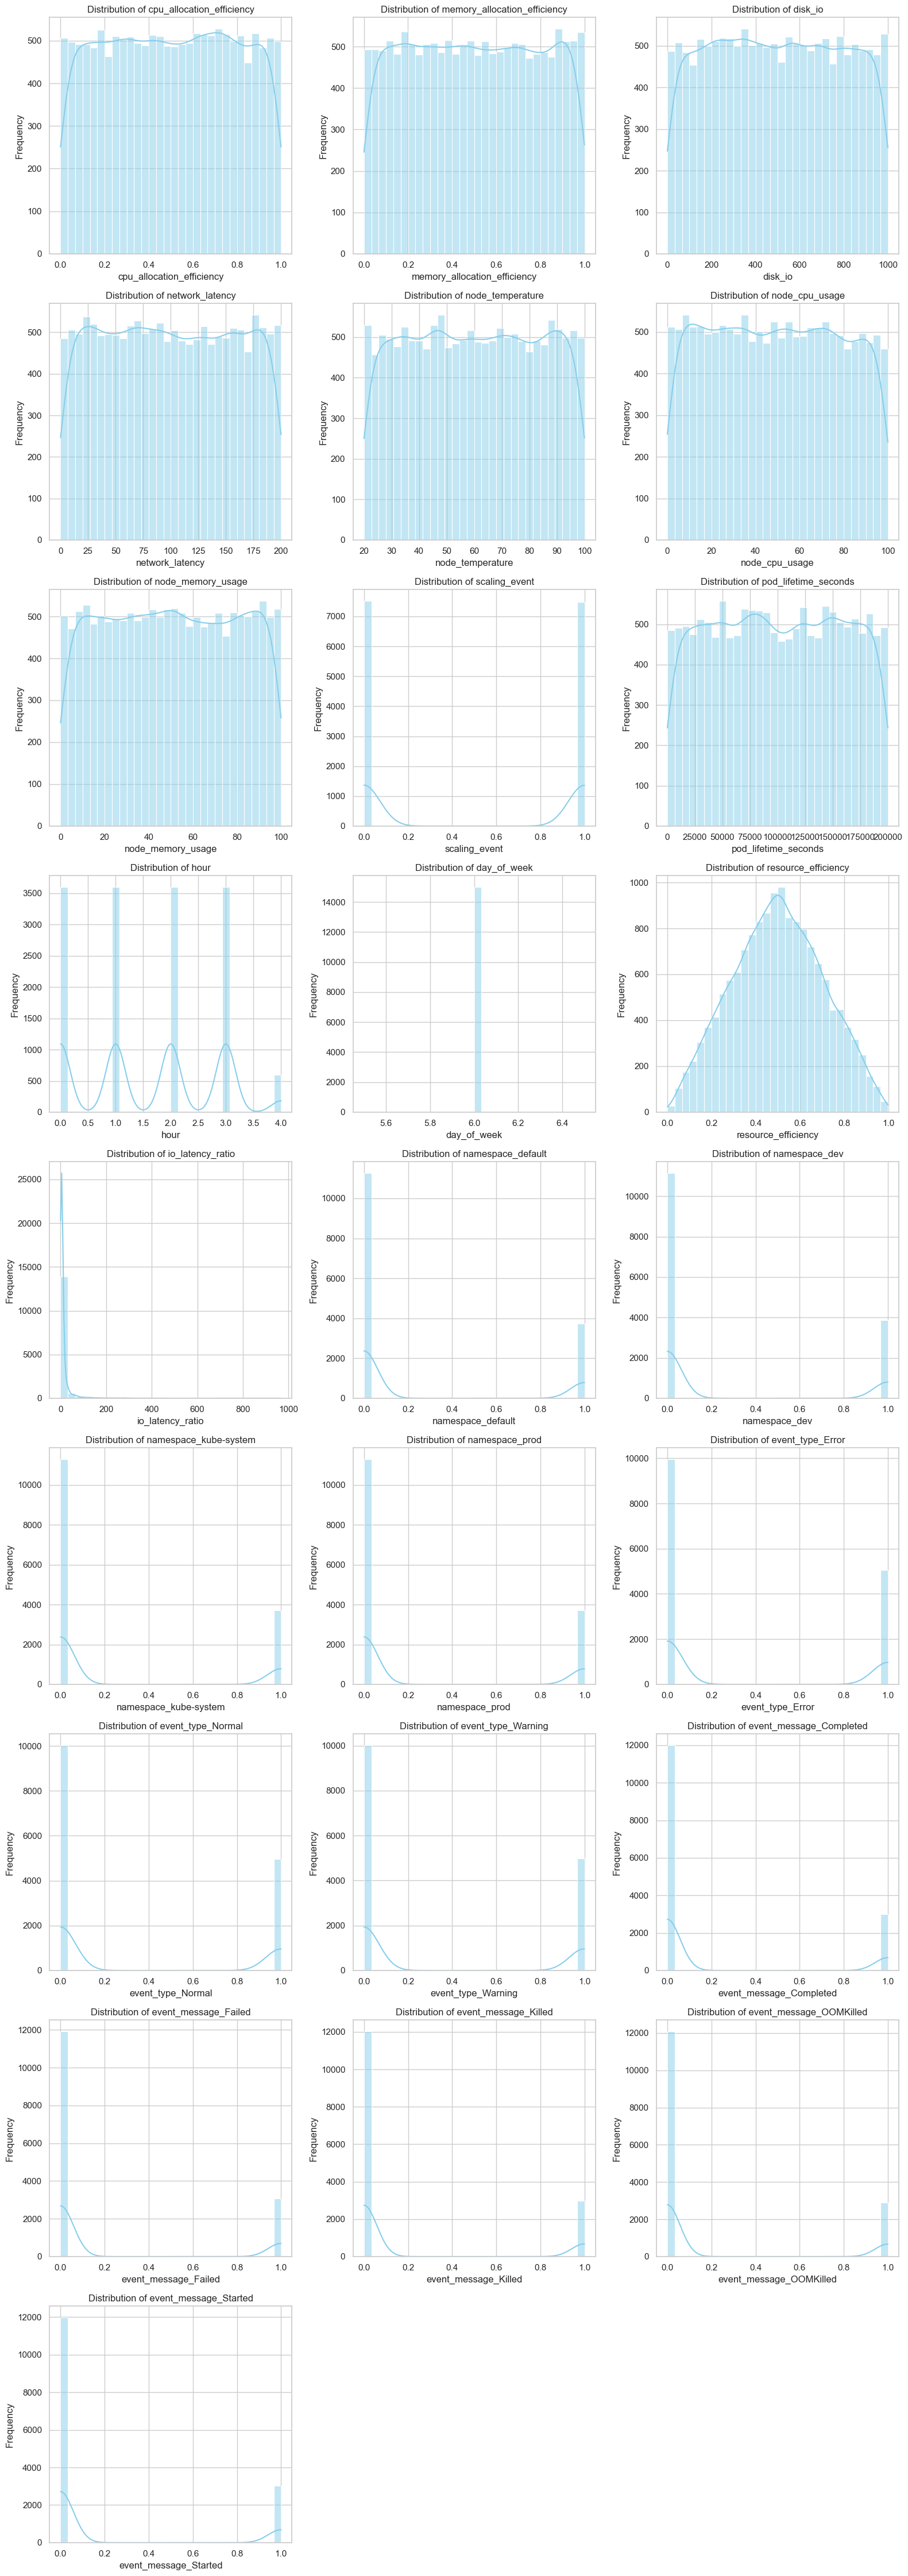

In [123]:
import math

# Exclude these columns from plotting
exclude_cols = ["pod_name", "timestamp"]

# Pick all other columns
plot_columns = [col for col in df_encoded.columns if col not in exclude_cols]

# Choose how many subplots per row
n_cols = 3
n_rows = math.ceil(len(plot_columns) / n_cols)

plt.figure(figsize=(16, 5 * n_rows))

for i, col in enumerate(plot_columns, start=1):
    plt.subplot(n_rows, n_cols, i)

    # If it's numeric, use histplot with KDE
    if pd.api.types.is_numeric_dtype(df_encoded[col]):
        sns.histplot(data=df_encoded, x=col, kde=True, bins=30, color="skyblue")
        plt.ylabel("Frequency")
    else:
        # Otherwise, treat as categorical and show a countplot
        sns.countplot(x=col, data=df_encoded, color="skyblue")
        plt.xticks(rotation=45, ha="right")
        plt.ylabel("Count")

    plt.title(f"Distribution of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

## 8. Conclusion and Next Steps

Congratulations! 🎉 You’ve completed the first step in our journey to enhance Kubernetes operations with AI. In this notebook, we:
1. **Explored the Dataset:**
   - Previewed the structure and key statistics.
   - Identified and visualized missing values, outliers, and feature distributions.

2. **Handled Data Quality Issues:**
   - Imputed missing values with appropriate strategies.
   - Addressed outliers to ensure model robustness.

3. **Engineered Features:**
   - Extracted meaningful time-based and derived features for operational insights.
   - Encoded categorical variables and scaled numerical features for machine learning readiness.

4. **Analyzed Feature Relationships:**
   - Used correlation heatmaps to uncover dependencies.
   - Leveraged interactive widgets for dynamic data exploration.

In [124]:
# Save preprocessed data
df_encoded.to_csv("data/preprocessed_kubernetes_data.csv", index=False)
print("Preprocessed dataset saved.")

Preprocessed dataset saved.


### Next Steps

In the next notebook, we’ll build on this preprocessed dataset to develop machine learning models that predict incidents in Kubernetes environments. Specifically, we’ll:
- Introduce supervised learning concepts.
- Train a model to classify operational incidents (e.g., Normal, Warning, Error).
- Evaluate model performance using metrics like precision, recall, and accuracy.

**Key Takeaways for Notebook 2:**
- Ensure the preprocessed dataset is saved and available (`preprocessed_kubernetes_data.csv`).
- Review correlations and features created in this notebook, as they will directly influence model performance.

Let’s move forward to unlock the predictive power of AI in Kubernetes operations!